In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#import io
df = pd.read_csv('Walmart DataSet.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
# prompt: You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following: a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most? b. If the weekly sales show a seasonal trend, when a

# 1. Check if the weekly sales are affected by the unemployment rate
from scipy.stats import pearsonr
# Calculate the correlation between weekly sales and unemployment rate
corr = df['Weekly_Sales'].corr(df['Unemployment'])
print('Correlation between weekly sales and unemployment rate:', corr)
# Check if the correlation is statistically significant
corr, p_value = pearsonr(df['Weekly_Sales'], df['Unemployment'])
print('P-value:', p_value)
# Interpret the results
if p_value < 0.05:
  print('The correlation between weekly sales and unemployment rate is statistically significant.')
else:
  print('The correlation between weekly sales and unemployment rate is not statistically significant.')



Correlation between weekly sales and unemployment rate: -0.10617608965795429
P-value: 1.3448365210234661e-17
The correlation between weekly sales and unemployment rate is statistically significant.


In [53]:
# prompt: which store performing worst due to unemployment

# 2. Find the store that is performing the worst due to the unemployment rate
# Calculate the weekly sales for each store
store_sales = df.groupby('Store')['Weekly_Sales'].mean()
# Calculate the unemployment rate for each store
store_unemployment = df.groupby('Store')['Unemployment'].mean()

# Merge the two DataFrames
merged_df = pd.merge(store_sales, store_unemployment, on='Store')

# Calculate the correlation between weekly sales and unemployment rate for each store
merged_df['Correlation'] = merged_df['Weekly_Sales'].corr(merged_df['Unemployment'])

# Find the store with the lowest correlation


print('The five stores that are performing the worst due to the unemployment rate are:\n', worst_stores)

The five stores that are performing the worst due to the unemployment rate are:
        Weekly_Sales  Unemployment  Correlation
Store                                         
1      1.555264e+06      7.610420    -0.112281
25     7.067215e+05      7.371413    -0.112281
26     1.002912e+06      7.872070    -0.112281
27     1.775216e+06      8.001748    -0.112281
28     1.323522e+06     13.116483    -0.112281


In [ ]:
#Handle missing values
import pandas as pd
missing_values = df.isnull().sum()
print('Missing values:', missing_values)

df = df.fillna(method='pad')
# Check if there are any missing values left
missing_values = df.isnull().sum()
print('Missing values:', missing_values)



Missing values: Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Missing values: Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:

outliers = df[df['Weekly_Sales'] > df['Weekly_Sales'].quantile(0.99)]
print('Outliers:', outliers)
df = df[df['Weekly_Sales'] <= df['Weekly_Sales'].quantile(0.99)]




Outliers:       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
185       2  26-11-2010    2658725.29             1        62.98       2.735   
188       2  17-12-2010    2609166.75             0        47.55       2.869   
189       2  24-12-2010    3436007.68             0        49.97       2.886   
237       2  25-11-2011    2614202.30             1        56.36       3.236   
240       2  16-12-2011    2432736.52             0        50.13       3.159   
...     ...         ...           ...           ...          ...         ...   
3764     27  24-12-2010    3078162.08             0        31.34       3.309   
3812     27  25-11-2011    2504400.71             1        47.88       3.689   
3816     27  23-12-2011    2739019.75             0        41.59       3.587   
5480     39  24-12-2010    2495489.25             0        58.86       2.886   
5532     39  23-12-2011    2554482.84             0        54.62       3.112   

             CPI  Unemploymen

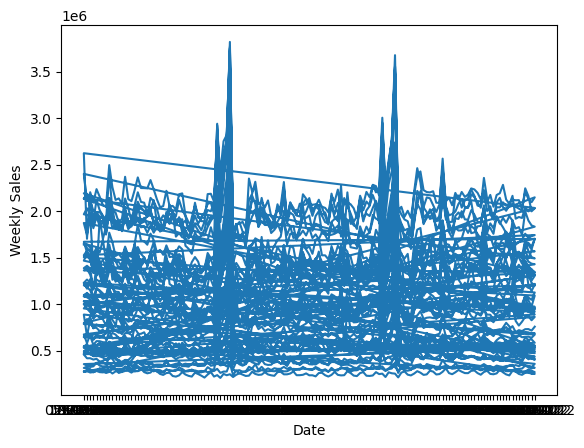

In [ ]:
# 2. Check if the weekly sales show a seasonal trend
# Create a line plot of weekly sales over time
plt.plot(df['Date'], df['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()




<ipython-input-16-3e7f7c739d9c>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Month'] = pd.to_datetime(df['Date']).dt.month


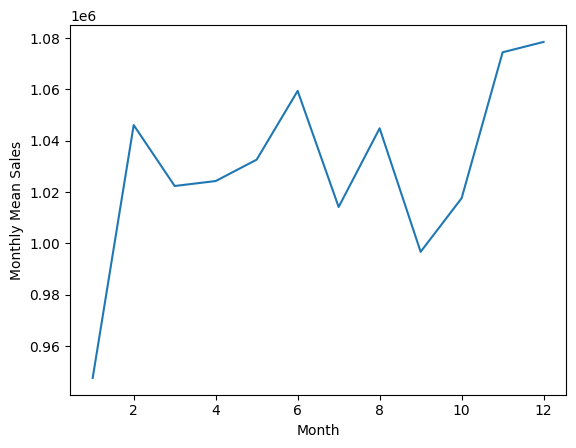

In [ ]:
# prompt: Check if there is a clear seasonal pattern in the data

df['Month'] = pd.to_datetime(df['Date']).dt.month
monthly_mean_sales = df.groupby('Month')['Weekly_Sales'].mean()
# Create a line plot of monthly mean sales over time
plt.plot(monthly_mean_sales.index, monthly_mean_sales.values)
plt.xlabel('Month')
plt.ylabel('Monthly Mean Sales')
plt.show()



Correlation between weekly sales and temperature: -0.03291029318686123
P-value: 0.00861814525120905
The correlation between weekly sales and temperature is statistically significant.


<ipython-input-52-512e07f1d5e0>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


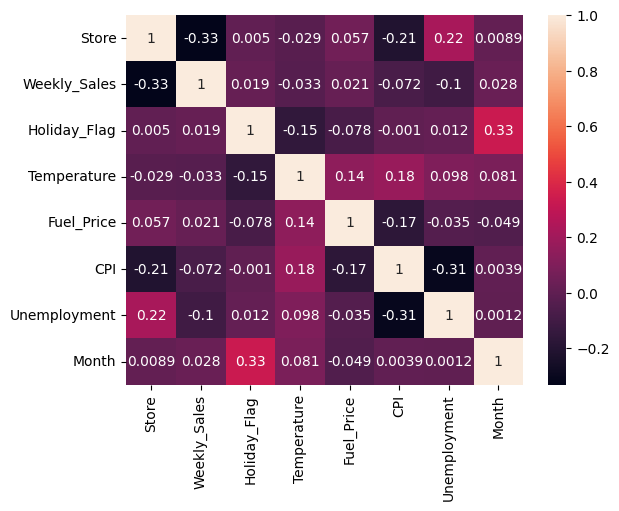

In [ ]:
# 3. Does temperature affect the weekly sales in any manner?

# Calculate the correlation between weekly sales and temperature
corr = df['Weekly_Sales'].corr(df['Temperature'])
print('Correlation between weekly sales and temperature:', corr)
# Check if the correlation is statistically significant
corr, p_value = pearsonr(df['Weekly_Sales'], df['Temperature'])
print('P-value:', p_value)
# Interpret the results
if p_value < 0.05:
  print('The correlation between weekly sales and temperature is statistically significant.')
else:
  print('The correlation between weekly sales and temperature is not statistically significant.')

# Create a correlation matrix
corr_matrix = df.corr()
# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()



In [ ]:
# 4: How is the Consumer Price index affecting the weekly sales of various stores?

df['CPI'] = df['CPI'].fillna(method='ffill')

# Calculate the correlation between weekly sales and consumer price index
corr = df['Weekly_Sales'].corr(df['CPI'])
print('Correlation between weekly sales and consumer price index:', corr)
# Check if the correlation is statistically significant
corr, p_value = pearsonr(df['Weekly_Sales'], df['CPI'])
print('P-value:', p_value)
# Interpret the results
if p_value < 0.05:
  print('The correlation between weekly sales and consumer price index is statistically significant.')
else:
  print('The correlation between weekly sales and consumer price index is not statistically significant.')


Correlation between weekly sales and consumer price index: -0.07197798044119162
P-value: 8.868588943087374e-09
The correlation between weekly sales and consumer price index is statistically significant.


In [55]:
#5. Top performing stores according to the historical data.

df['Weekly_Sales'] = df['Weekly_Sales'].fillna(0).astype(float)
# Group by store and calculate the total weekly sales
store_sales = df.groupby('Store')['Weekly_Sales'].sum()
# Sort the stores by total weekly sales in descending order
top_stores = store_sales.sort_values(ascending=False)
# Print the top 5 stores
print('Top 5 stores:', top_stores.head())


Top 5 stores: Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [56]:
# 6: The worst performing store, and how significant is the difference between the highest and lowest performing stores.

# Get the worst performing store
worst_store = top_stores.tail(1)

print('The Worst performing store:',worst_store)
# Calculate the difference between the highest and lowest performing stores
difference = (top_stores.head(1) - worst_store)
print(top_stores.head(1))
# Print the difference
print('Difference between the highest and lowest performing stores:', difference)
# Calculate the percentage difference


The Worst performing store: Store
33    37160221.96
Name: Weekly_Sales, dtype: float64
Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64
Difference between the highest and lowest performing stores: Store
20   NaN
33   NaN
Name: Weekly_Sales, dtype: float64


Mean absolute error: 375075.12973588245
Mean squared error: 219846425915.35864
Root mean squared error: 468877.83687796403


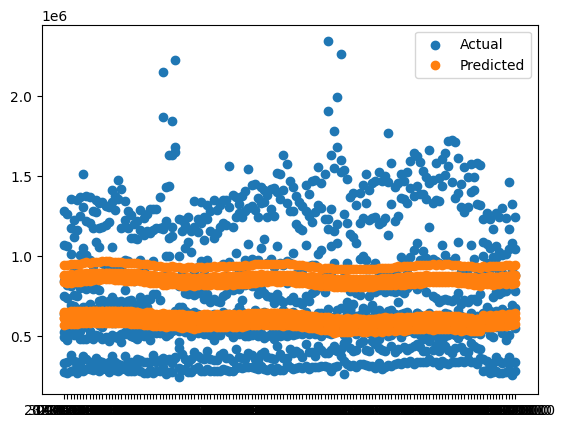

In [ ]:
# prompt: Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
# Split the data into training and test sets
train_df = df.head(int(0.8 * len(df)))
test_df = df.tail(int(0.2 * len(df)))

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(train_df[['Store', 'Temperature', 'CPI']], train_df['Weekly_Sales'])

# Make predictions for the test set
predictions = model.predict(test_df[['Store', 'Temperature', 'CPI']])

# Evaluate the model
print('Mean absolute error:', mean_absolute_error(test_df['Weekly_Sales'], predictions))
print('Mean squared error:', mean_squared_error(test_df['Weekly_Sales'], predictions))
print('Root mean squared error:', np.sqrt(mean_squared_error(test_df['Weekly_Sales'], predictions)))

# Plot the predictions
plt.scatter(test_df['Date'], test_df['Weekly_Sales'], label='Actual')
plt.scatter(test_df['Date'], predictions, label='Predicted')
plt.legend()
plt.show()


Mean absolute error: 79943.04186588968
Mean squared error: 20622873336.953392
Root mean squared error: 143606.66188221698
R-squared: 0.9324591293482902


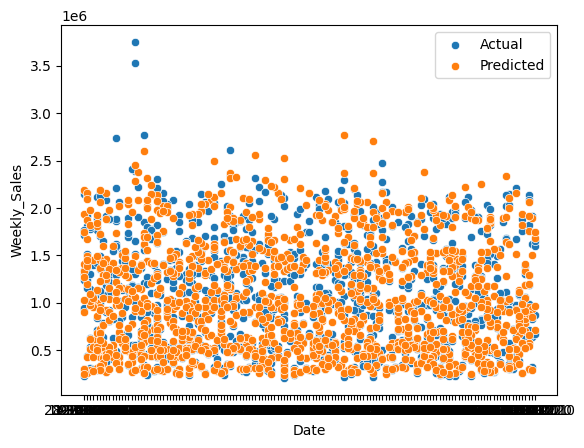

In [ ]:
# prompt: use random forest

# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2)

# Create a random forest model
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
model.fit(train_df[['Store', 'Temperature', 'CPI']], train_df['Weekly_Sales'])

# Make predictions for the test set
predictions = model.predict(test_df[['Store', 'Temperature', 'CPI']])

# Evaluate the model
print('Mean absolute error:', mean_absolute_error(test_df['Weekly_Sales'], predictions))
print('Mean squared error:', mean_squared_error(test_df['Weekly_Sales'], predictions))
print('Root mean squared error:', np.sqrt(mean_squared_error(test_df['Weekly_Sales'], predictions)))
print('R-squared:', r2_score(test_df['Weekly_Sales'], predictions))

# Plot the predictions
sns.scatterplot(x=test_df['Date'], y=test_df['Weekly_Sales'], label='Actual')
sns.scatterplot(x=test_df['Date'], y=predictions, label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Cluster centroids:
[[ 0.19775927 -0.95391079]
 [-1.4186345   0.4227613 ]
 [ 0.92403507  0.72924023]]


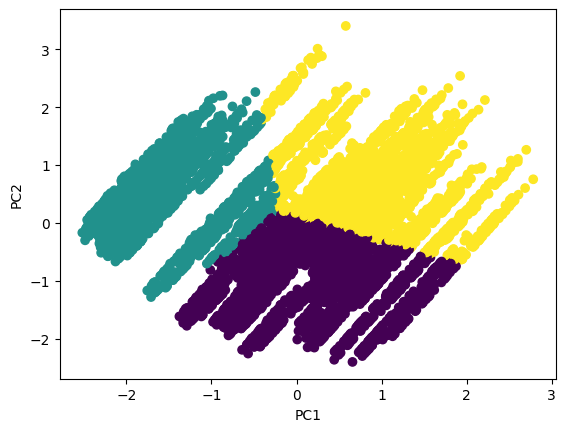

In [ ]:
# prompt: use kmean to predict

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# Preprocess the data
scaler = StandardScaler()
df[['Store', 'Temperature', 'CPI']] = scaler.fit_transform(df[['Store', 'Temperature', 'CPI']])

# Perform PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['Store', 'Temperature', 'CPI']])

# Calculate the silhouette score for different values of k
silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_pca)
  silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))

# Select the optimal value of k based on the silhouette score
optimal_k = np.argmax(silhouette_scores) + 2

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(df_pca)

# Assign cluster labels to the data
df['Cluster'] = kmeans.labels_

# Print the cluster centroids
print('Cluster centroids:')
print(kmeans.cluster_centers_)

# Plot the data points with their cluster labels
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
